In [1]:
import os
import sys
import xarray
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import skimage as ski
from file_handling.generic_handlers import dir_file_split_len
from image_handling.imagej_manager import ImageJManager
from analysis_class import ImageProcessor
from image_handler_class import ImageAlignmentAndTifConversion
from key_class import Key

ij = ImageJManager('default').get_ij()

Registered segmentation method: cellpose
Registered segmentation method: unknown
Registered segmentation method: other


In [19]:
from image_handling.fiji_commands import read_images_to_python

['D:/Patrick/Infection/save_files/Tif/aligned_images/date-20250220_techReplicate-1_well-F12_construct-SED1_experiment-Blasticidin1ug_experimentcondition-Blasticidin_experimentparameter-1_replicate-3_passages-17_exposurecam1-25_exposurecam2-25_cyanled-12U5_blueled-12U5_greenled-6U5.tif']

In [13]:
segmenter = ImageProcessor(ij, r"D:/Patrick/Infection/save_files/Tif/aligned_images/", tracker_file=r'D:\Patrick\tracking_jsons\new_heat_tracker.json', dataframe_file=r'D:\Patrick\dataframes\retry_heat-blast_dataframe.pkl')
segmenter.image_segmentation()

2025-05-31 22:41:13,511 - INFO - Progress: 3408/3408 files processed. 0 remaining. files failed: 164.


,label,area,donor_intensity_mean,donor_intensity_min,donor_intensity_max,donor_intensity_std,acceptor_intensity_mean,acceptor_intensity_min,acceptor_intensity_max,acceptor_intensity_std,...,experiment,experimentcondition,experimentparameter,replicate,passages,exposurecam1,exposurecam2,cyanled,blueled,greenled
0,1,16145.0,3233.475830,528.0,8880.0,1937.807129,4019.669189,331.188416,11073.675781,2503.466064,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
1,2,16932.0,2478.803955,564.0,5508.0,1171.928955,3201.475098,386.283203,6996.691406,1523.470581,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
2,3,17239.0,3135.282471,479.0,8428.0,1746.276733,3913.017578,386.175659,10727.284180,2324.516846,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
3,4,17527.0,3101.083496,777.0,6954.0,1312.081421,4041.770996,930.837341,8734.411133,1624.779541,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
4,5,29934.0,4476.021484,460.0,11586.0,2356.858154,5887.382812,374.739044,15040.096680,3174.642090,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687682,31,2339.0,737.031616,329.0,1182.0,109.716934,0.000000,0.000000,0.000000,0.000000,...,Heatshock,Heatshock,32,3,32,25,25,12U5,12U5,6U5
687683,32,6846.0,433.139801,221.0,678.0,71.403168,0.000000,0.000000,0.000000,0.000000,...,Heatshock,Heatshock,32,3,32,25,25,12U5,12U5,6U5
687684,33,7535.0,536.103394,225.0,936.0,132.149551,0.000000,0.000000,0.000000,0.000000,...,Heatshock,Heatshock,32,3,32,25,25,12U5,12U5,6U5
687685,34,3043.0,367.879730,193.0,768.0,50.218216,0.000000,0.000000,0.000000,0.000000,...,Heatshock,Heatshock,32,3,32,25,25,12U5,12U5,6U5


In [18]:
df =segmenter.dataframe_storage.df

df.to_csv('D:/Patrick/Csv.csv')

In [14]:
save_dir = r'D:/Patrick/dataframes/' 
save_name = 'Heat_Blast_df.csv'
segmenter.save_dataframe(save_dir, save_name)

TypeError: ImageProcessor.save_dataframe() takes 2 positional arguments but 3 were given

In [2]:
key_list = [r'D:\Patrick\Keys\Blasticidin1_20250220.csv',
           r'D:\Patrick\Keys\Blasticidin1_20250225.csv',
           r'D:\Patrick\Keys\Blasticidin1_20250226.csv',
           r'D:\Patrick\Keys\Blasticidin10_20250220.csv',
           r'D:\Patrick\Keys\Blasticidin10_20250225.csv',
           r'D:\Patrick\Keys\Blasticidin10_20250226.csv',
           r'D:\Patrick\Keys\Heatshock32_20250228.csv',
           r'D:\Patrick\Keys\Heatshock32_20250304.csv',
           r'D:\Patrick\Keys\Heatshock32_20250305.csv',
           ]

image_directory_list = [r'D:\Patrick\Infection\New_parameters\Blasticidin1ug_20250220', 
                       r'D:\Patrick\Infection\New_parameters\Blasticidin1ug_20250225',
                       r'D:\Patrick\Infection\New_parameters\Blasticidin1ug_20250226',
                       r'D:\Patrick\Infection\New_parameters\Blasticidin10ug_20250220',
                       r'D:\Patrick\Infection\New_parameters\Blasticidin10ug_20250221',
                       r'D:\Patrick\Infection\New_parameters\Blasicidin10ug_20250225',
                       r'D:\Patrick\Infection\New_parameters\Heatshock32_20250228',
                        r'D:\Patrick\Infection\New_parameters\Heatshock32_20250304',
                       r'D:\Patrick\Infection\New_parameters\Heatshock32_20250305',
                       ]

experiment_type = ['nonosmotic', 
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                  'nonosmotic',
                    'nonosmotic',
                   'nonosmotic',
                   ]

In [ ]:
from image_handling.image_functions import stack_method

aligning_image =ij.io().open(r'D:\Patrick\Infection\New_parameters\Blasticidin1ug_20250220\20250220_Blasticidin1ug_PK-FRET, PK-FRET_Image_A1-1.vsi')
py_img = ij.py.from_java(aligning_image)
aligning_image = ij.py.to_imageplus(aligning_image)
aligning_image.changes = False
aligning_image.close()
del aligning_image
working_img = py_img.isel(t=0)
ch_1 = working_img.isel(ch=0)
ch_2 = working_img.isel(ch=1)
sr = stack_method('rigid_body')
sr.register(ch_1, ch_2)

for key, images, experiment in zip(key_list, image_directory_list, experiment_type):
    file_len = dir_file_split_len(images)
    if file_len == 4:
        save_data = ['date', None, None, 'well']
    elif file_len == 5:
        save_data = ['date', None, None, None, 'well']
    tmp_key = Key(key, save_data, skip_validation=True)
    aligning_class = ImageAlignmentAndTifConversion(ij=ij,  observation_methods=1, initialized_key=tmp_key, 
                                                tracker_name=r"D:\Patrick\tracking_jsons\try_new_tracker.json", experiment=experiment)
    aligning_class.cam2_alignment_register = sr
    aligning_class.process_images(images, save_dir=r'D:\Patrick\Infection\save_files\Tif\\')



2025-06-02 10:55:33,813 - INFO - Progress: 178/768 files processed. 590 remaining. files failed: 0.


image concatenating
Used Memory: 45.37 MB
Free Memory: 114.63 MB
Total Allocated Memory: 160.00 MB
Max JVM Memory: 8180.00 MB
Opening image
True


In [5]:
print(sr)

In [3]:
aligning_class.file_tracker.reset_tracker()

2025-03-13 20:06:03,374 - INFO - Tracker data saved.
2025-03-13 20:06:03,374 - INFO - Tracker has been reset.


In [11]:
from pystackreg import StackReg as sr

alignment = sr(sr.RIGID_BODY)
alignment.register(image_array.isel(ch=0), image_array.isel(ch=1))    
alignment_method = alignment
dimensions = image_array.dims

excluded_channels = []  # Safely handles mutable default argument

stationary_channel =0
realigned_list = []
for index in range(image_array.sizes['ch']):
    current_img = image_array.isel(ch=index)
    
    if index in excluded_channels or index == stationary_channel:  # Combined two conditionals for clarity
        realigned_list.append(current_img)
        print('appended here')
        continue
    print('alignment 2')
    if alignment_method is not None:  # Replaced != None with is not None (PEP 8 style)
        print('I am here')
        registered_image = alignment_method.transform(current_img)
        print('over here')
        realigned_list.append(xarray.DataArray(registered_image, dims=current_img.dims, coords=current_img.coords))
        print('appended')
    else:
        realigned_list.append(current_img)  # Removed redundant wrapping with DataArray again
    print('align_here 3')
aligned_images = xarray.concat(realigned_list, dim='ch')
#aligned_images = reshape_image(aligned_images, new_dim_list=required_dims)  # Ensures final dims are consistent
print(aligned_images.sizes)


appended here
alignment 2
I am here
over here
appended
align_here 3
Frozen({'ch': 2, 'row': 2048, 'col': 2048})


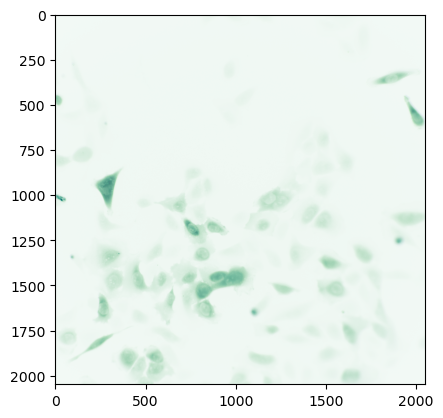

In [17]:
plt.imshow(aligned_images.isel(ch=0), cmap='Blues')
plt.imshow(aligned_images.isel(ch=1), cmap='Greens', alpha=0.5)

In [5]:
df2.to_csv(r'E:\Patrick\Infection\New_parameters\20250214_infection_save\csvs\second_test.csv')

In [6]:
print(df2)

        label     area  donor_intensity_mean  donor_intensity_min  \
0           1   2953.0           6647.837402               2087.0   
1           2   4245.0           4230.544922                950.0   
2           3    153.0           1241.732056                697.0   
3           4  10625.0           2596.640869                214.0   
4           5   9630.0            868.782349                293.0   
...       ...      ...                   ...                  ...   
123671     74   3126.0           2258.308105               1121.0   
123672     75   5691.0           7330.384766               1616.0   
123673     76   2052.0           4273.045410               1334.0   
123674     77   2575.0           4389.634766               1365.0   
123675     78   1067.0           5098.072266               1733.0   

        donor_intensity_max  donor_intensity_std  acceptor_intensity_mean  \
0                   10984.0          1906.072754              9388.821289   
1                

In [7]:
df= pd.read_csv(r'E:\Patrick\Infection\New_parameters\20250207_infection_save\csvs\first_test.csv')

In [9]:
#calculation
def pixels_to_micron(df: pd.DataFrame, area_column: str='area', pixels_per_micron: float = 3.0769) -> pd.DataFrame:
    df= df.rename(columns={area_column: 'area_pixels'})
    df['area_micron'] = df['area_pixels']/pixels_per_micron
    return df

def acceptor_correction(df: pd.DataFrame, stat:str = 'mean', crossex_correction: float=0.068, bleedthrough_correction:float=0.47)-> pd.DataFrame:
    df['crossexcitation_correction'] = crossex_correction
    df['bleedthrough_correction'] = bleedthrough_correction
    df['acceptor_corrected_'+stat] = df['acceptor_intensity_'+stat] - df['donor_intensity_'+stat] *bleedthrough_correction - df['directAcceptor_intensity_'+stat] * crossex_correction
    return df

def calculate_efret(df: pd.DataFrame, stat: str='mean')->pd.DataFrame:
    df['Efret'] = df['acceptor_corrected_'+stat]/(df['donor_intensity_'+stat]+df['acceptor_corrected_'+stat])
    return df

def area_cutoffs(df: pd.DataFrame, area = 'area_micron', lower_cutoff:float = 600.0, upper_cutoff: float=7000)-> pd.DataFrame:
    df = df.loc[(df[area] > lower_cutoff) & (df[area] < upper_cutoff)]
    df = df.reset_index(drop=True)
    return df

def remove_maximums(df: pd.DataFrame, channel: str, value_cutoff: float = 55000)-> pd.DataFrame:
    channel_cutoff = channel+'_intensity_max'
    df = df.loc[df[channel_cutoff] < value_cutoff]
    df = df.reset_index(drop=True)
    return df 

def calculate_time(df: pd.DataFrame, experiment: str): 
    experiment_timeframe ={
        'infection' : 4,
        'osmoticperturbation' : 0.1,
        'heatshock': 0.5,
        'blasticidin': 0.5,
    }
    
    timeframe = experiment_time[experiment]
    df['time'] = df['timepoint'].astype(int) * timeframe
    return df

def remove_minimums(df: pd.DataFrame, channel: str, value_cutoff = 400)-> pd.DataFrame:
    channel_cutoff = channel+'_intensity_min'
    df = df.loc[df[channel_cutoff] > value_cutoff]
    df = df.reset_index(drop=True)
    return df

def directacceptor_mean_cutoffs(df: pd.DataFrame, lower_cutoff: float = 1000, upper_cutoff=40000) -> pd.DataFrame:
    df = df.loc[(df['directAcceptor_intensity_mean']> lower_cutoff) & (df['directAcceptor_intensity_mean'] < upper_cutoff)]
    return df


def donor_mean_cutoffs(df: pd.DataFrame, lower_cutoff: float = 600, upper_cutoff=20000) -> pd.DataFrame:
    df = df.loc[(df['donor_intensity_mean']> lower_cutoff) & (df['donor_intensity_mean'] < upper_cutoff)]
    return df

def infection_false_positives(df: pd.DataFrame) -> pd.DataFrame:
    # Define threshold conditions for each timepoint
    thresholds = {
        0: 400, 
        1: 2000, 
        2: 7000,
        3: 15000,  # Extend for other timepoints if needed
    }
    
    # Apply filtering conditionally for timepoints in the dictionary
    for time, threshold in thresholds.items():
        df = df.loc[~((df['timepoint'] == time) & (df['mCherry_intensity_mean'] > threshold))]

    df = df.reset_index(drop=True)
    return df

def infection_parameters(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()  # Ensure original DataFrame is not modified in place
    #df['experimentparameter'] = np.where(df['mCherry_intensity_mean'] < mCherry_intensity, 'noninfected', 'infected')
    noninfected_df = df.loc[df['mCherry_intensity_mean']< 250]
    noninfected_df['experimentparameter'] = 'noninfected'
    
    low_df = df.loc[(df['mCherry_intensity_mean'] > 250) & (df['mCherry_intensity_mean'] < 1000)]
    low_df['experimentparameter'] = 'low infection'
    
    med_df = df.loc[(df['mCherry_intensity_mean'] > 1000) & (df['mCherry_intensity_mean'] < 10000)]
    med_df['experimentparameter'] = 'med infection'
    
    high_df = df.loc[(df['mCherry_intensity_mean'] > 10000)]
    high_df['experimentparameter'] = 'high infection'
    
    df = pd.concat([noninfected_df, low_df, med_df, high_df])
    return df

def set_categorical_order(df: pd.DataFrame, column_name: str, category_order: list[str]) -> pd.DataFrame:
    df = df.copy()  # Ensure we don't modify the original DataFrame in-place

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    
    # Ensure existing values in the column are not lost
    existing_values = df[column_name].dropna().unique()
    
    # Combine user-defined order with existing unique values while preserving order
    complete_order = list(dict.fromkeys(category_order + list(existing_values)))  

    # Apply the categorical dtype
    cat_type = CategoricalDtype(categories=complete_order, ordered=True)
    df[column_name] = df[column_name].astype(cat_type)

    return df  # Return modified DataFrame without affecting other columns

def sort_values(df: pd.DataFrame, sort_dict: dict[str, list[str]])-> pd.DataFrame:
    tmp_df = df.copy()
    for index, sorter_values in sort_dict.items():
        new_df = set_catergorical_values(tmp_df, index, sorter_values)
    return new_df
    
def compare_deltas(df: pd.DataFrame,  group_values: list, delta_column: str) -> pd.DataFrame:
    # Ensure sorting for time-based delta calculations
    df = df.sort_values(by=group_values)

    new_grouper = group_values.remove('timepoint')
    # Compute deltas for the given column
    df[f'delta_{delta_column}'] = df.groupby(new_grouper)[delta_column].diff()
    
    return df


def get_counts(df: pd.DataFrame, group_values: list):
    #count per experiment
    #count per construct
    #count per condition
    #count per parameter
    #count per timepoint
    #count per date
    #count per well
    #count of wells
    #count per replicate
    
    tmp_counts = df.groupby(group_values)['Efret'].count()
    return tmp_counts


def get_medians(df: pd.DataFrame, group_values):
    tmp_medians = df.groupby(group_values)['Efret'].median()
    return tmp_medians    

def get_errorbars():
    return

In [11]:
import seaborn as sns
#print(len(df))
#print(len(df2))
#comb_df = pd.concat([df, df2])
#print(len(comb_df))

C:\Users\patri\AppData\Local\Temp\ipykernel_14748\3749248432.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noninfected_df['experimentparameter'] = 'noninfected'
C:\Users\patri\AppData\Local\Temp\ipykernel_14748\3749248432.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df['experimentparameter'] = 'low infection'
C:\Users\patri\AppData\Local\Temp\ipykernel_14748\3749248432.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

       label  area_pixels  donor_intensity_mean  donor_intensity_min  \
0          1       2953.0           6647.837402               2087.0   
1         18       6507.0           2299.197754                482.0   
2         19       4576.0           2550.741211                492.0   
3         13       6810.0           1270.035156                514.0   
4         18       7924.0           1288.723389                444.0   
...      ...          ...                   ...                  ...   
60808     37      21307.0          10489.071289               1683.0   
60809     38       6005.0           2288.942139               1248.0   
60816     46      11603.0           4712.062500               1416.0   
60817     47       8594.0           3738.977051                664.0   
60818     48       6827.0           4200.674316               1891.0   

       donor_intensity_max  donor_intensity_std  acceptor_intensity_mean  \
0                  10984.0          1906.072754            

<Axes: xlabel='construct', ylabel='Efret'>

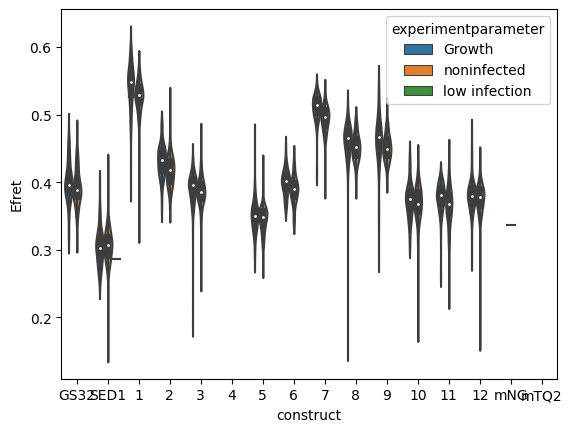

In [27]:


tmp_df = pixels_to_micron(df2)
tmp_df = acceptor_correction(tmp_df)
tmp_df = calculate_efret(tmp_df)
tmp_df = area_cutoffs(tmp_df)
tmp_df = remove_maximums(tmp_df, 'directAcceptor')
tmp_df = remove_minimums(tmp_df, 'directAcceptor')
tmp_df = directacceptor_mean_cutoffs(tmp_df)
tmp_df = donor_mean_cutoffs(tmp_df)
tmp_df = infection_false_positives(tmp_df)
tmp_df = infection_parameters(tmp_df)



construct_order = ['GS32', 'SED1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
experiment_order = ['Infection']
experiment_condition = ['Growth', 'Infection']
experiment_parameter = ['noninfected', 'infected']

my_sort_dict = {
            'construct' : construct_order,
            'experiment': experiment_order,
            'experimentcondition': experiment_condition,
            'experimentparameter': experiment_parameter, 
               }




tmp_df = set_categorical_order(tmp_df, column_name='construct', category_order= construct_order)


growth_df = tmp_df.loc[tmp_df['experimentcondition'] == 'Growth']
noninfected_only = growth_df.loc[growth_df['experimentparameter'] == 'noninfected']
noninfected_only['experimentparameter'] = 'Growth'


this_df = tmp_df.loc[tmp_df['experimentcondition'] == 'Infection']

test_df = pd.concat([noninfected_only, this_df])

test_df  = test_df .loc[test_df ['timepoint']=='0']
#test_df  = test_df .loc[test_df['construct']=='1']
sns.violinplot(test_df, x='construct', y='Efret', hue='experimentparameter')



In [26]:
df2

,label,area,donor_intensity_mean,donor_intensity_min,donor_intensity_max,donor_intensity_std,acceptor_intensity_mean,acceptor_intensity_min,acceptor_intensity_max,acceptor_intensity_std,...,construct,experiment,experimentcondition,replicate,passages,exposurecam1,cyanled,exposurecam2,blueled,greenled
0,1,2953.0,6647.837402,2087.0,10984.0,1906.072754,9388.821289,5526.832031,14527.038086,2165.582520,...,9,Infection,Infection,1,21,25,12u5,25,12u5,6u5
1,2,4245.0,4230.544922,950.0,9734.0,1423.404297,4854.447266,307.898529,10329.111328,1843.824097,...,9,Infection,Infection,1,21,25,12u5,25,12u5,6u5
2,3,153.0,1241.732056,697.0,2043.0,291.369934,919.417603,373.976166,2014.572144,388.826813,...,9,Infection,Infection,1,21,25,12u5,25,12u5,6u5
3,4,10625.0,2596.640869,214.0,4867.0,1288.427002,3717.738525,415.568054,6830.301270,1837.979370,...,9,Infection,Infection,1,21,25,12u5,25,12u5,6u5
4,5,9630.0,868.782349,293.0,1413.0,215.324570,1248.128174,337.957672,1982.171387,317.290100,...,9,Infection,Infection,1,21,25,12u5,25,12u5,6u5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123671,74,3126.0,2258.308105,1121.0,4882.0,730.349670,1309.568115,0.000000,3248.113525,347.391846,...,mTQ2,Infection,Growth,3,25,25,12u5,25,12u5,6u5
123672,75,5691.0,7330.384766,1616.0,10606.0,1667.831543,3712.254395,0.000000,5502.651855,1241.664551,...,mTQ2,Infection,Growth,3,25,25,12u5,25,12u5,6u5
123673,76,2052.0,4273.045410,1334.0,10130.0,2189.566895,2183.445801,0.000000,5171.686523,1375.748169,...,mTQ2,Infection,Growth,3,25,25,12u5,25,12u5,6u5
123674,77,2575.0,4389.634766,1365.0,9452.0,1767.066895,2585.014893,0.000000,5441.430664,1184.838867,...,mTQ2,Infection,Growth,3,25,25,12u5,25,12u5,6u5


In [ ]:
img= img.transpose('t', 'ch', 'row', 'col' )
java_img = ij.py.to_java(img)
java_img.shape


In [25]:
ij.IJ.save(java_img, r'E:\test.tif')

In [89]:
tmp_img = img.isel(t=4)
fig, ax = plt.subplots(1, 3, figsize=(10,10))
for i in range(img.sizes['ch']):
    ax[i].imshow(img.isel(ch=i, t=6))
    

AttributeError: 'ij.CompositeImage' object has no attribute 'isel'

In [ ]:
class DataCleaner:
    def __init__(self, df):
        self.dataframe = df
        self.cleaned_df = 
        
        self.plotting_Storage = PlottingStorage()
        self.plotting_storage.experiment_dict = self.__get_unique_experiments()
        self.plotting_storage.timepoint_dict  = self.__get_timepoints() 

    
    def __get_unique_experiments(self)-> dict:
        unique_experiments = self.dataframe.experiment.unique()
        return {index: unique_experiment[index] for index in range(len(unique_experiment))}

    def __get_unique_experiment_time(self, experiment)-> dict:
        tmp_df = self.dataframe.loc[self.dataframe['experiment'] == experiment]
        unique_timepoint = tmp_df.timepoint.unique()
        return {index: unique_experiment[index] for index in range(len(unique_timepoint))}

    def __get_timepoints(self):
        return {self.plotting_storage.experiment_dict[index]: self.__get_unique_experiment_time(self.plotting_storage.experiment_dict[index]) for index in range(len(self.plotting_storage.experiment_dict[index]))}

    def __get_(self):

    def __clean_df(self):
        

In [3]:
tmp_df = pd.read_pickle(r"D:\Patrick\dataframes\new_heat-blast_dataframe.pkl")
tmp_df

,label,area,donor_intensity_mean,donor_intensity_min,donor_intensity_max,donor_intensity_std,acceptor_intensity_mean,acceptor_intensity_min,acceptor_intensity_max,acceptor_intensity_std,...,experiment,experimentcondition,experimentparameter,replicate,passages,exposurecam1,exposurecam2,cyanled,blueled,greenled
0,1,16145.0,3233.475830,528.0,8880.0,1937.807129,4019.669189,331.188416,11073.675781,2503.466064,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
1,2,16930.0,2478.993652,564.0,5508.0,1171.881470,3201.735352,386.283203,6996.691406,1523.421875,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
2,3,17239.0,3135.282471,479.0,8428.0,1746.276733,3913.017578,386.175659,10727.284180,2324.516846,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
3,4,17526.0,3101.185303,777.0,6954.0,1312.049927,4041.830322,930.837341,8734.411133,1624.807007,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
4,5,29935.0,4475.891602,460.0,11586.0,2356.926270,5887.264160,374.739044,15040.096680,3174.654785,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2,24139.0,4345.398438,357.0,14375.0,3282.398926,5665.245605,375.777954,18572.964844,4277.662598,...,Heatshock,Heatshock,42,3,22,25,25,12U5,12U5,6U5
8774,3,6183.0,5188.751953,1667.0,7657.0,1327.695068,6262.342773,1262.593140,9246.972656,1810.974976,...,Heatshock,Heatshock,42,3,22,25,25,12U5,12U5,6U5
8775,4,9497.0,2007.556030,372.0,4454.0,1009.002380,2600.651855,609.989197,5309.506348,1202.585938,...,Heatshock,Heatshock,42,3,22,25,25,12U5,12U5,6U5
8776,5,12164.0,7921.045898,1665.0,14153.0,3274.875488,9566.375977,571.809814,17128.648438,4180.632324,...,Heatshock,Heatshock,42,3,22,25,25,12U5,12U5,6U5


In [4]:
os.getcwd()

'D:\\Patrick\\Infection\\save_files\\Tif\\aligned_images'

In [3]:
'D:\\Patrick\\Infection\\save_files\\Tif\\aligned_images'

In [3]:
cwd = r'D:\Patrick\Infection\save_files\Tif\aligned_images'

# List all files (excluding directories)
long_files = [f for f in os.listdir(cwd)]

long_files[499]

'date-20250220_techReplicate-1_well-F5_construct-6_experiment-Blasticidin1ug_experimentcondition-Blasticidin_experimentparameter-1_replicate-2_passages-21_exposurecam1-25_exposurecam2-25_cyanled-12U5_blueled-12U5_greenled-6U5.tif'

In [6]:


aligning_image = ij.io().open(r'D:\Patrick\test.tif')

py_img = ij.py.from_java(aligning_image)
py_img.sizes

Frozen({'t': 9, 'row': 2048, 'col': 2048, 'ch': 3})

Frozen({'row': 2048, 'col': 2048, 'ch': 3})


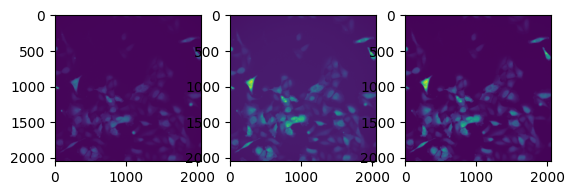

In [7]:
look_at = py_img.isel(t=0)
print(look_at.sizes)
fig, ax = plt.subplots(1, 3)
for i in range(look_at.sizes['ch']):
    
    cur_ch = look_at.isel(ch=i)
    ax[i].imshow(cur_ch)

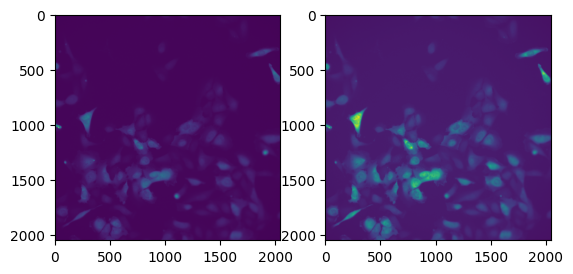

In [17]:
fig, ax =plt.subplots(1, 2)
ax[0].imshow(ch_1)
ax[1].imshow(new_img)

In [6]:
img =ij.io().open(r'D:\Patrick\rename.tif')
print(type(img))

'''
img = ij.py.from_java(img)
print(img.sizes)

image_array = img.isel(t=0)
'''


<java class 'net.imagej.DefaultDataset'>


AttributeError: 'net.imagej.DefaultDataset' object has no attribute 'dispose'

In [7]:
del img


gc.collect()


NameError: name 'gc' is not defined

In [8]:
import jpype
import gc

gc.collect()

# Access Java runtime
Runtime = jpype.JClass("java.lang.Runtime")
runtime = Runtime.getRuntime()

# Force Java GC (optional, to clean stale refs)
runtime.gc()
runtime.runFinalization()
# Fetch memory stats
total_memory = runtime.totalMemory()    # in bytes
free_memory = runtime.freeMemory()      # in bytes
used_memory = total_memory - free_memory
max_memory = runtime.maxMemory()        # in bytes

# Display in megabytes
print(f"Used Memory: {used_memory / 1024**2:.2f} MB")
print(f"Free Memory: {free_memory / 1024**2:.2f} MB")
print(f"Total Allocated Memory: {total_memory / 1024**2:.2f} MB")
print(f"Max JVM Memory: {max_memory / 1024**2:.2f} MB")



Used Memory: 65.56 MB
Free Memory: 168.44 MB
Total Allocated Memory: 234.00 MB
Max JVM Memory: 8180.00 MB


In [3]:
from pathlib import Path
img_path = Path(r'D:/Patrick/Infection/save_files/Tif/aligned_images/date-20250206_techReplicate-1_well-B12_construct-8_experiment-Heatshock_experimentcondition-Heatshock_experimentparameter-42_replicate-3_passages-21_exposurecam1-25_exposurecam2-25_cyanled-12U5_blueled-12U5_greenled-6U5.tif')
img =ij.io().open(str(img_path))


In [24]:
gc.collect()

# Access Java runtime
Runtime = jpype.JClass("java.lang.Runtime")
runtime = Runtime.getRuntime()

# Force Java GC (optional, to clean stale refs)
runtime.gc()
runtime.runFinalization()
# Fetch memory stats
total_memory = runtime.totalMemory()    # in bytes
free_memory = runtime.freeMemory()      # in bytes
used_memory = total_memory - free_memory
max_memory = runtime.maxMemory()        # in bytes

# Display in megabytes
print(f"Used Memory: {used_memory / 1024**2:.2f} MB")
print(f"Free Memory: {free_memory / 1024**2:.2f} MB")
print(f"Total Allocated Memory: {total_memory / 1024**2:.2f} MB")
print(f"Max JVM Memory: {max_memory / 1024**2:.2f} MB")



Used Memory: 501.85 MB
Free Memory: 1185.15 MB
Total Allocated Memory: 1687.00 MB
Max JVM Memory: 3072.00 MB


In [82]:

del img

In [6]:
from jpype import JClass
#works with openImage()
# Access the service
DisplayService = JClass("org.scijava.display.DisplayService")
display_service = ij.get(DisplayService)

# Close all displays
for display in list(display_service.getDisplays()):
    print(f"Closing display: {display.getName()}")
    display.close()

In [23]:
gc.collect()

# Access Java runtime
Runtime = jpype.JClass("java.lang.Runtime")
runtime = Runtime.getRuntime()

# Force Java GC (optional, to clean stale refs)
runtime.gc()
runtime.runFinalization()
# Fetch memory stats
total_memory = runtime.totalMemory()    # in bytes
free_memory = runtime.freeMemory()      # in bytes
used_memory = total_memory - free_memory
max_memory = runtime.maxMemory()        # in bytes

# Display in megabytes
print(f"Used Memory: {used_memory / 1024**2:.2f} MB")
print(f"Free Memory: {free_memory / 1024**2:.2f} MB")
print(f"Total Allocated Memory: {total_memory / 1024**2:.2f} MB")
print(f"Max JVM Memory: {max_memory / 1024**2:.2f} MB")


Used Memory: 688.67 MB
Free Memory: 611.33 MB
Total Allocated Memory: 1300.00 MB
Max JVM Memory: 3072.00 MB


In [10]:
WindowManager = JClass("ij.WindowManager")
ImagePlus = JClass("ij.ImagePlus")

image_ids = WindowManager.getIDList()
# Close all open ImagePlus instances
for i in range(WindowManager.getImageCount()):
    imp = WindowManager.getImage(i + 1)
    if imp is not None:
        imp.changes = False
        imp.close()



In [2]:
# Get the DatasetService class
#checks for items, doesnt delete
from jpype import JClass
DatasetService = JClass("net.imagej.DatasetService")

# Get the service from the ImageJ context
dataset_service = ij.get(DatasetService)

# Now list the open datasets
datasets = list(dataset_service.getDatasets())
print("Open Datasets:", len(datasets))
for ds in datasets: 
    print("Dataset:", type(ds))
    

JVMNotRunning: Java Virtual Machine is not running

In [21]:
# Get ImageDisplayService
ImageDisplayService = JClass("net.imagej.display.ImageDisplayService")
image_display_service = ij.get(ImageDisplayService)

# Get DatasetService to list datasets
DatasetService = JClass("net.imagej.DatasetService")
dataset_service = ij.get(DatasetService)

# Loop over datasets and close their associated displays
for dataset in dataset_service.getDatasets():
    display = image_display_service.getActiveDatasetView(dataset)
    print(display)
    if display is not None:
        print(f"Closing display for: {dataset.getName()}")
        


In [1]:
#Worked to close datasets, runs first
DisplayService = JClass("org.scijava.display.DisplayService")
display_service = ij.get(DisplayService)

# Close all displays explicitly
for d in list(display_service.getDisplays()):
    print(f"Closing display: {d.getName()}")
    d.close()


NameError: name 'JClass' is not defined

In [9]:
ij.IJ.run("Collect Garbage", "")
ij.IJ.run("Fresh Start", "")

In [4]:
from jpype import JClass
#ran, 
ImageDisplayService = JClass("net.imagej.display.ImageDisplayService")
DatasetService = JClass("net.imagej.DatasetService")

image_display_service = ij.get(ImageDisplayService)
dataset_service = ij.get(DatasetService)

for dataset in dataset_service.getDatasets():
    view = image_display_service.getActiveDatasetView(dataset)
    print(f"{dataset.getName()} has view? {view is not None}")


In [6]:
import objgraph
objgraph.show_most_common_types(limit=10)

function                   86401
dict                       77847
tuple                      60916
list                       29757
ReferenceType              26699
builtin_function_or_method 21405
cell                       20307
getset_descriptor          12533
method_descriptor          8007
type                       7969


In [22]:
import gc
print("Functions:", len([o for o in gc.get_objects() if isinstance(o, type(lambda: None))]))
print("Dicts:", len([o for o in gc.get_objects() if isinstance(o, dict)]))


C:\Users\Owner\anaconda3\envs\pyimagej_v2\lib\site-packages\torch\distributed\distributed_c10d.py:293: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


Functions: 90932
Dicts: 80590


In [79]:
DisplayService = JClass("org.scijava.display.DisplayService")
display_service = ij.get(DisplayService)

for d in display_service.getDisplays():
    print(f"Active display: {d.getName()} (Type: {d.getClass().getName()})")


In [7]:
import scyjava as sj
w = sj.jimport('ij.WindowManager')
w.closeAllWindows()

True

In [10]:
result = ij.window().clear()

In [80]:
jpype.java.lang.System.gc()